### 1.  Import Required Libraries
Import the necessary libraries, including Keras, Matplotlib, NumPy, and sklearn.

In [1]:
# Importing the required libraries
import matplotlib.pyplot as plt
from keras.datasets import mnist
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten

### 2.  Load and Subset MNIST Dataset
Load the MNIST dataset and create a subset for training and testing.

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Create a new subset dataset
subset_train_indices = []
subset_test_indices = []
for class_label in range(10):
    class_indices = np.where(y_train == class_label)[0]
    subset_train_indices.extend(class_indices[:60])
    class_indices = np.where(y_test == class_label)[0]
    subset_test_indices.extend(class_indices[60:70])

X_train = X_train[subset_train_indices]
y_train = y_train[subset_train_indices]
X_test = X_test[subset_test_indices]
y_test = y_test[subset_test_indices]

### 3.  Display Class Distribution
Print the number of instances for each class in the training and testing datasets.

In [3]:
# Print the number of instances per class in the training dataset
print("Training dataset:")
for i in range(10):
    print(f"Class {i}: {sum(y_train == i)} instances")

# Print the number of instances per class in the testing dataset
print("\nTesting dataset:")
for i in range(10):
    print(f"Class {i}: {sum(y_test == i)} instances")

Training dataset:
Class 0: 60 instances
Class 1: 60 instances
Class 2: 60 instances
Class 3: 60 instances
Class 4: 60 instances
Class 5: 60 instances
Class 6: 60 instances
Class 7: 60 instances
Class 8: 60 instances
Class 9: 60 instances

Testing dataset:
Class 0: 10 instances
Class 1: 10 instances
Class 2: 10 instances
Class 3: 10 instances
Class 4: 10 instances
Class 5: 10 instances
Class 6: 10 instances
Class 7: 10 instances
Class 8: 10 instances
Class 9: 10 instances


### 4.  Display Length of Training and Testing Data
Print the length of the subset training and testing data.

In [4]:
# Display the length of each part
print(f"Length of subset training data: {len(X_train)}")
print(f"Length of subset testing data: {len(X_test)}")

Length of subset training data: 600
Length of subset testing data: 100


### 5.  Shift Images Randomly
Randomly shift the images in the training dataset horizontally.

In [5]:
# Create a copy of the training dataset
X_shifted = np.copy(X_train) 

# For each image in the dataset
for i in range(len(X_shifted)):
    # Randomly select a shift value between -4 and 4
    shift = np.random.choice([-4, 4])
    # Shift the image horizontally
    X_shifted[i] = np.roll(X_shifted[i], shift, axis=1)

# Replace the original training dataset with the shifted dataset
X_train  = np.copy(X_shifted)

### 6.  Display Random Images
Display random images from the training dataset in a grid.

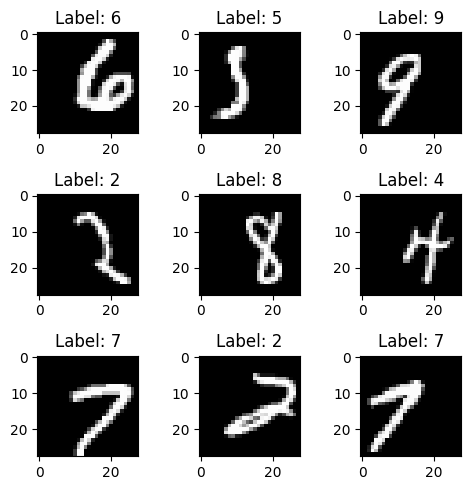

In [6]:
# Display random images in a grid
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flat):
    # Randomly select an image index
    index = np.random.randint(0, X_train.shape[0])
    # Get the corresponding image and label
    image = X_train[index]
    label = y_train[index]
    # Display the image and its label
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}')
plt.tight_layout()
plt.show()

### 7.  Reshape and Normalize Input Data
Reshape the input data and normalize it by dividing by 255.

In [7]:
# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Normalize the input data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')

### 8.  Convert Class Vectors to Binary Class Matrices
Convert the class vectors to binary class matrices using the to_categorical function.

In [8]:
# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 9.  Define the CNN Model Architecture
Define the architecture of the model, including Conv2D, MaxPooling2D, Flatten, and Dense layers.

In [9]:
# Define the model architecture
model = Sequential()
# Add a Conv2D layer with 128 filters, a 3x3 kernel, and 'relu' activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# Add a MaxPooling2D layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a Conv2D layer with 256 filters, a 3x3 kernel, and 'relu' activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a MaxPooling2D layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a Conv2D layer with 512 filters, a 3x3 kernel, and 'relu' activation function
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
# Add a MaxPooling2D layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the tensor output from the previous layer
model.add(Flatten())
# Add a Dense layer with 128 units and 'relu' activation function
model.add(Dense(128, activation='relu'))
# Add a Dense layer with 10 units (for the 10 classes) and 'softmax' activation function
model.add(Dense(10, activation='softmax'))

### 10.  Compile the Model
Compile the model using the categorical crossentropy loss, Adam optimizer, and accuracy as the metric.

In [10]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

### 11.  Train the Model
Train the model using the training data, with a batch size of 128 and for 100 epochs.

In [11]:
# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1)

Epoch 1/100
5/5 [==============================] - 2s 152ms/step - loss: 2.2750 - accuracy: 0.1817
Epoch 2/100
5/5 [==============================] - 1s 304ms/step - loss: 2.0035 - accuracy: 0.4067
Epoch 3/100
5/5 [==============================] - 1s 288ms/step - loss: 1.4860 - accuracy: 0.5317
Epoch 4/100
5/5 [==============================] - 1s 249ms/step - loss: 0.9843 - accuracy: 0.7117
Epoch 5/100
5/5 [==============================] - 1s 178ms/step - loss: 0.7396 - accuracy: 0.7683
Epoch 6/100
5/5 [==============================] - 1s 175ms/step - loss: 0.5790 - accuracy: 0.8333
Epoch 7/100
5/5 [==============================] - 1s 174ms/step - loss: 0.4087 - accuracy: 0.8750
Epoch 8/100
5/5 [==============================] - 1s 198ms/step - loss: 0.3440 - accuracy: 0.8983
Epoch 9/100
5/5 [==============================] - 1s 183ms/step - loss: 0.3071 - accuracy: 0.9067
Epoch 10/100
5/5 [==============================] - 1s 188ms/step - loss: 0.2124 - accuracy: 0.9350
Epoch 11/

### 12.  Evaluate the Model on Training Data
Evaluate the model on the training data and print the training accuracy.

In [12]:
# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

# Print the training accuracy
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 1.0


### 13.  Evaluate the Model on Test Data
Evaluate the model on the test data and print the test accuracy.

In [13]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7900000214576721
